In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# accessing the file from google drive and using head() to see first five complete rows just to understant the dataset
path='/content/drive/MyDrive/Dataset/netflix.csv'
df=pd.read_csv(path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# using shape function we will know number total number of rows and columns
df.shape

(8807, 12)

In [5]:
# info() will give us idea regarding datatype of each column elements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# to see total number of null values in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# coverting the date_added column datatype from object type to datetime object
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [8]:
#Handling missing value
df.fillna({'director':'Unavailable','cast':'Unavailable','country':'Unavailable','rating':'Unavailable'},inplace=True)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,3


In [9]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
df.loc[df['director']=='Louis C.K.','duration']=df['rating']
df[df['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [11]:
df.loc[df['director']=='Louis C.K.','rating']='Unavailable'
df[df['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


In [13]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
# substituting the null values with the maximun data
df.loc[df['date_added'].isnull(),'date_added']=df['date_added'].max()

In [15]:
# checking null values
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [16]:
# Total Number of Movie Vs TV Show
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


Text(0.5, 1.0, 'Total Number  Movie Vs TV Show')

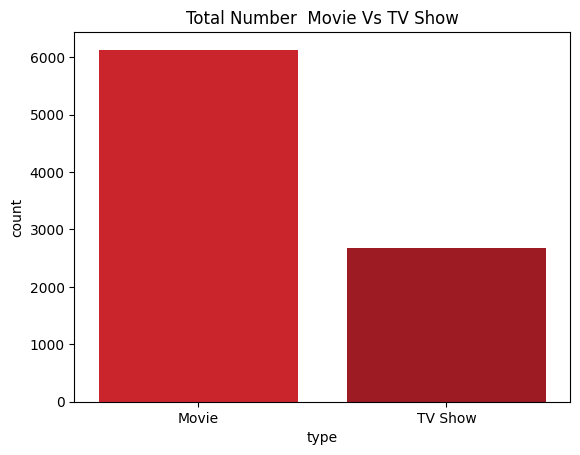

In [17]:
# Total Number of Movie Vs TV Show
# Define custom Netflix-like colors
netflix_palette = ['#E50914', '#B20710', '#221F1F', '#292F33', '#F5F5F1']
sns.countplot(x=df['type'],hue='type',data=df,palette={'Movie':'#E50914','TV Show':'#B20710'})
plt.title('Total Number  Movie Vs TV Show')

 in the span of 14 years  6131 number of movies and 2676 number of tv shows were added on the netflix                                                   
 -69.615 % Movies  

 -30.385 % TV Shows

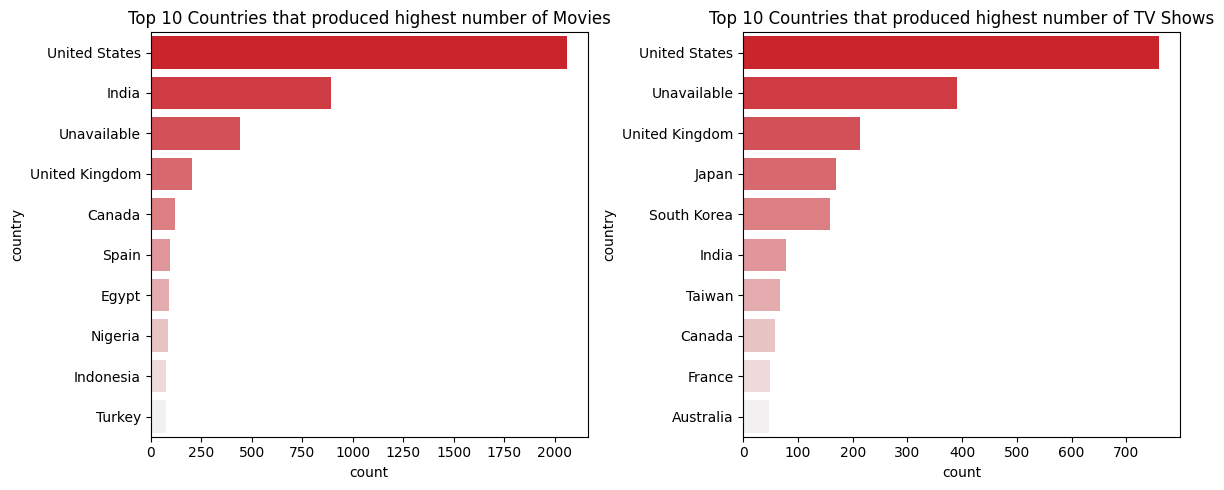

In [18]:
# Top 10 countries that produced highest number of TV Shows and Movies
top10_country_Movie=df[df['type']=='Movie']['country'].value_counts().head(10)
top10_country_TvShow=df[df['type']=='TV Show']['country'].value_counts().head(10)

# Define the base color (Netflix red)
netflix_red = "#E50914"

# Generate 10 shades of Netflix red
red = sns.light_palette(netflix_red, n_colors=10, reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(y=top10_country_Movie.index,palette=red,x=top10_country_Movie,label='Movie',ax=ax1,hue=top10_country_Movie.index)
ax1.set_title('Top 10 Countries that produced highest number of Movies')

sns.barplot(y=top10_country_TvShow.index,palette=red,x=top10_country_TvShow,label='TV Show',ax=ax2,hue=top10_country_TvShow.index)
ax2.set_title('Top 10 Countries that produced highest number of TV Shows')

#Adjust subplots to fit into figure area.
plt.tight_layout()
plt.show()

from the chart above it looks like 'USA' tops in creating content in both the
type 'Movie'as well as 'TV Shows'.                                              

'India' and 'United Kingdom' ranks 2nd in creating content in 'Movies' and 'TV Shows' respectively.

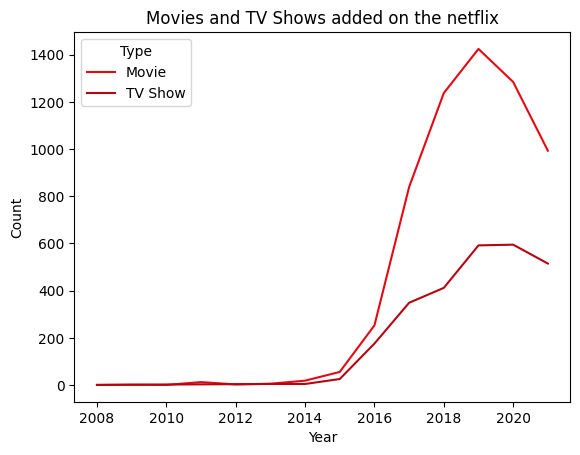

In [19]:
#Movies and TV Shows added on the netflix:
x=df[df['type']=='Movie']['date_added'].dt.year.value_counts().sort_index()
y=df[df['type']=='TV Show']['date_added'].dt.year.value_counts().sort_index()
sns.lineplot(x=x.index,y=x,label='Movie',color='#E50914')
sns.lineplot(x=y.index,y=y,label='TV Show',color='#B20710')
plt.title('Movies and TV Shows added on the netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')

form the line chart above, we can see that there is surge in adding movies and tv shows on netflix from 2015 onwards. The trend is upwards till 2019 and from 2019 there is a downward trend, showing the impact of Covid19 Pandemic on content creation.

In [20]:
# Best month to launch a TV Show on Netflix

# Creating a new column in the dataframe for month
df['Month_added']=df['date_added'].dt.month

#converting digits in month column into their equivalent month name
df['Month_added']=df['Month_added'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%B'))

best_Month_Movie=df[df['type']=='Movie']['Month_added'].value_counts()[0:1]
best_Month_TvShow=df[df['type']=='TV Show']['Month_added'].value_counts()[0:1]

print(f'Best month to launch a Movie on Netflix is {best_Month_Movie.index[0]}')
print(f'Best month to launch a TV Show on Netflix is {best_Month_TvShow.index[0]}')

Best month to launch a Movie on Netflix is July
Best month to launch a TV Show on Netflix is December


In [21]:
# Extracting the week number in the in the year from the date_added column
df['week_added']=df['date_added'].apply(lambda x:x.isocalendar()[1])
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,38
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,38


In [22]:
# Best week where most number of movies were added
df[df['type']=='Movie'].groupby('week_added')['title'].nunique().sort_values(ascending=False).head(1)

,title
week_added,
1,316


From the above dataframe, it is clear that best week to add movies on the netflix is 1st week of Jan  

In [23]:
df[df['type']=='TV Show'].groupby('week_added')['title'].nunique().sort_values(ascending=False).head(1)

,title
week_added,
27,86


From the above dataframe, it is clear that best week to add tv shows on the netflix is 3rd week of Jul

In [24]:
# Creating a function what will unnest the intended column

def unnest_df(df,col):
  return df.drop(col,axis=1).join(df[col].str.split(',',expand=True).stack().reset_index(level=1,drop=True).rename(col))

In [25]:
# Un-nesting Cast Column so that we can find the highest content creator
unnested_cast=unnest_df(df,'cast')
unnested_cast.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,Month_added,week_added,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,38,Unavailable
1,s2,TV Show,Blood & Water,Unavailable,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,38,Ama Qamata


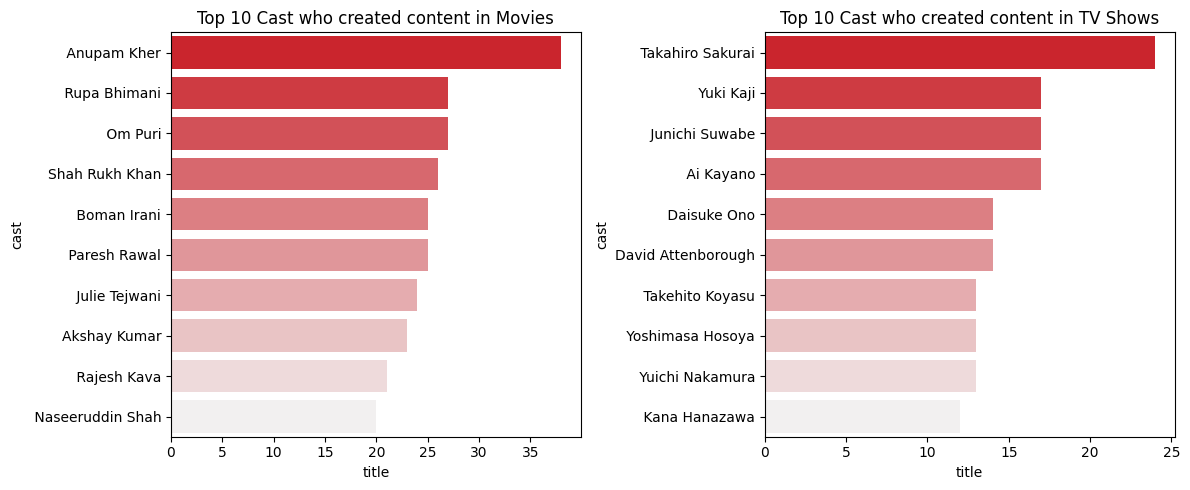

In [26]:
# top10 highest content creators in movies and tv shows

top10cast_Movie=unnested_cast[unnested_cast['type']=='Movie'].groupby('cast')['title'].nunique().sort_values(ascending=False).head(11)[1:12]
top10cast_TvShow=unnested_cast[unnested_cast['type']=='TV Show'].groupby('cast')['title'].nunique().sort_values(ascending=False).head(11)[1:12]

# Define the base color (Netflix red)
netflix_red = "#E50914"

# Generate 10 shades of Netflix red
red = sns.light_palette(netflix_red, n_colors=10, reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

sns.barplot(y=top10cast_Movie.index,palette=red,x=top10cast_Movie,ax=ax1,hue=top10cast_Movie.index)
ax1.set_title('Top 10 Cast who created content in Movies')

sns.barplot(y=top10cast_TvShow.index,palette=red,x=top10cast_TvShow,ax=ax2,hue=top10cast_TvShow.index)
ax2.set_title('Top 10 Cast who created content in TV Shows')

#Adjust subplots to fit into figure area.
plt.tight_layout()
plt.show()

From the above bar chart, we can say that **Anupam Kher** is the highest content creator with over 35+ movies and **Takhiro Sakurai** highest in tv show with over 20+ tv shows.

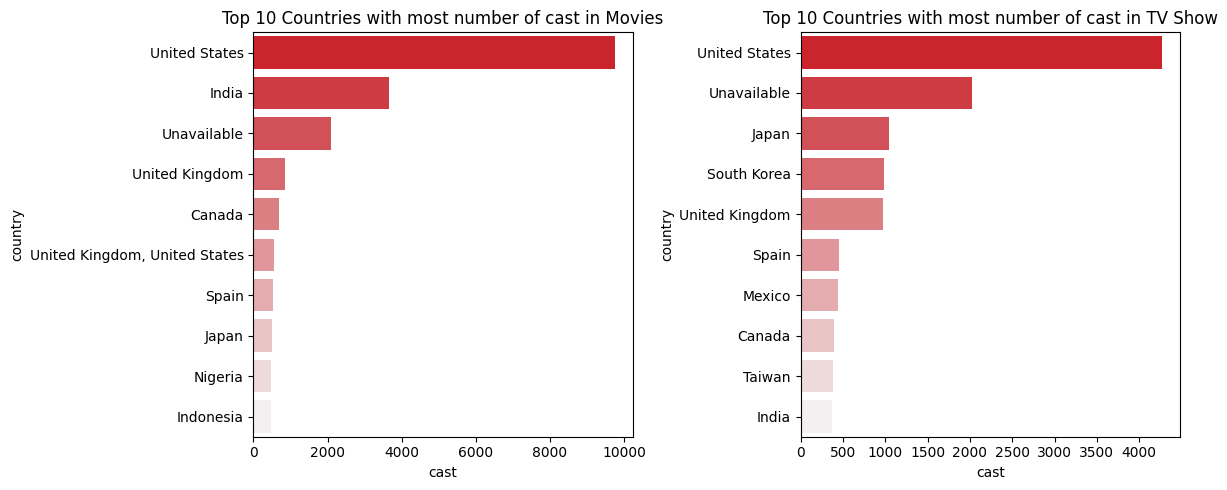

In [27]:
# Top 10 countries with most number of cast
top10_country_by_TvShowcast=unnested_cast[unnested_cast['type']=='TV Show'].groupby('country')['cast'].nunique().sort_values(ascending=False).head(10)
top10_country_by_Moviecast=unnested_cast[unnested_cast['type']=='Movie'].groupby('country')['cast'].nunique().sort_values(ascending=False).head(10)
# Define the base color (Netflix red)
netflix_red = "#E50914"

# Generate 10 shades of Netflix red
red = sns.light_palette(netflix_red, n_colors=10, reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

sns.barplot(y=top10_country_by_Moviecast.index,palette=red,x=top10_country_by_Moviecast,ax=ax1,hue=top10_country_by_Moviecast.index)
ax1.set_title('Top 10 Countries with most number of cast in Movies')

sns.barplot(y=top10_country_by_TvShowcast.index,palette=red,x=top10_country_by_TvShowcast,ax=ax2,hue=top10_country_by_TvShowcast.index)
ax2.set_title('Top 10 Countries with most number of cast in TV Show')

#Adjust subplots to fit into figure area.
plt.tight_layout()
plt.show()


we can say that as far as movies is concern, most number of cast are from USA followed by India and UK.

In TV Show also, most number of cast are from USA followed by Japan.

In [28]:
# Un-nesting Director Column so that we can find the highest Directors by number
# of movies or tv shows he/she directed

unnested_director=unnest_df(df,'director')
unnested_director.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,Month_added,week_added,director
0,s1,Movie,Dick Johnson Is Dead,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,38,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,38,Unavailable


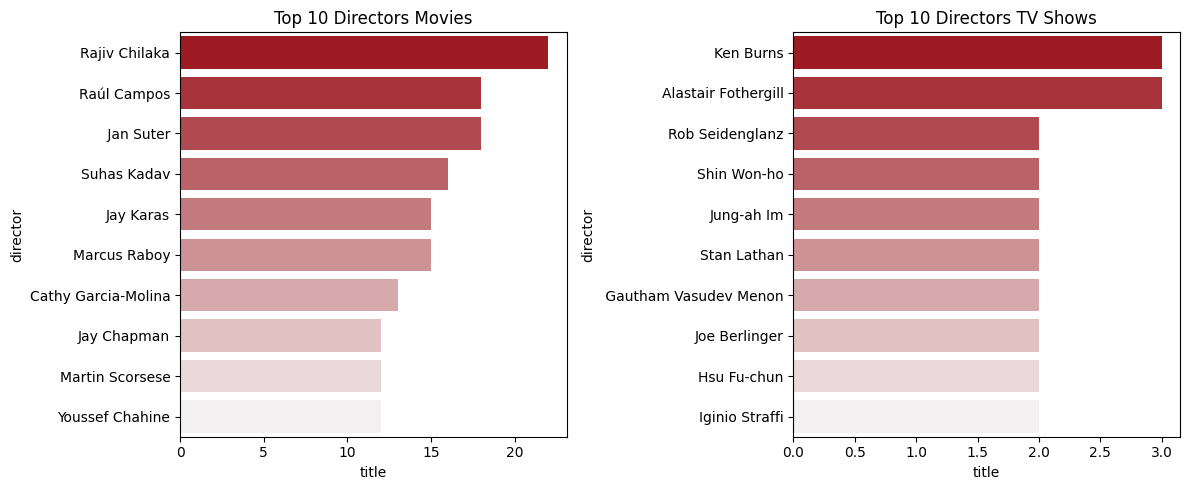

In [29]:
top10director_Movie=unnested_director[unnested_director['type']=='Movie'].groupby('director')['title'].nunique().sort_values(ascending=False).head(11)[1:12]
top10director_TvShow=unnested_director[unnested_director['type']=='TV Show'].groupby('director')['title'].nunique().sort_values(ascending=False).head(11)[1:12]

# Define the base color (Netflix red)
#netflix_palette = ['#E50914', '#B20710', '#221F1F', '#292F33', '#F5F5F1']
netflix_red = "#B20710"

# Generate 10 shades of Netflix red
red = sns.light_palette(netflix_red, n_colors=10, reverse=True)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

sns.barplot(y=top10director_Movie.index,palette=red,x=top10director_Movie,ax=ax1,hue=top10director_Movie.index)
ax1.set_title('Top 10 Directors Movies')

sns.barplot(y=top10director_TvShow.index,palette=red,x=top10director_TvShow,ax=ax2,hue=top10director_TvShow.index)
ax2.set_title('Top 10 Directors TV Shows')

#Adjust subplots to fit into figure area.
plt.tight_layout()
plt.show()

**Rajiv Chilaka** is the top director with over 20+ number of movies followed by **Raul Campops** and **Jan Suter**.  
**Ken Burns** and **Alastair Fothergill** are the top directors with equal contribution in **3** TV Shows each.

In [30]:
# Top 10 Director and Cast who worked together in different movies and tv shows
unnested_dirt_cast=unnest_df(unnested_director,'cast').reset_index(drop=True)
unnested_dirt_cast.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Month_added,week_added,director,cast
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,38,Kirsten Johnson,Unavailable
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,38,Unavailable,Ama Qamata


In [31]:
top10DirectorCast_Movie=unnested_dirt_cast[unnested_dirt_cast['type']=='Movie'].groupby(['director','cast'])['title'].nunique().sort_values(ascending=False).head(11)[1:11]
top10DirectorCast_TvShow=unnested_dirt_cast[unnested_dirt_cast['type']=='TV Show'].groupby(['director','cast'])['title'].nunique().sort_values(ascending=False).head(80)#[11:21]

top10DirectorCast_Movie = top10DirectorCast_Movie.reset_index()
top10DirectorCast_TvShow = top10DirectorCast_TvShow.reset_index()

print('Top 10 Director and cast who worked together in many Movies')
print(top10DirectorCast_Movie)
print(' ')
print('x-'*22)
print(' ')
print('Top 10 Director and cast who worked together in many TV Shows')
print(top10DirectorCast_TvShow)

Top 10 Director and cast who worked together in many Movies
        director               cast  title
0  Rajiv Chilaka      Julie Tejwani     19
1  Rajiv Chilaka        Rajesh Kava     19
2  Rajiv Chilaka       Rupa Bhimani     18
3  Rajiv Chilaka     Jigna Bhardwaj     18
4  Rajiv Chilaka       Vatsal Dubey     16
5  Rajiv Chilaka             Mousam     13
6  Rajiv Chilaka            Swapnil     13
7    Unavailable   Fortune Feimster     11
8    Unavailable        David Spade     11
9    Unavailable      London Hughes     10
 
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
 
Top 10 Director and cast who worked together in many TV Shows
       director               cast  title
0   Unavailable        Unavailable    298
1   Unavailable   Takahiro Sakurai     23
2   Unavailable          Yuki Kaji     16
3   Unavailable     Junichi Suwabe     16
4   Unavailable          Ai Kayano     15
..          ...                ...    ...
75  Unavailable         Emiri Kato      6
76  Unavailable     

Looks like from the above table **Rajiv Chilaka** as a director have worked with many cast in more than one movie.

In [32]:
# Unnesting listed_in column to know diversity of genre and finding most number
# of genre
unnested_listed_in=unnest_df(df,'listed_in')
unnested_listed_in.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Month_added,week_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,38,Documentaries
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,38,International TV Shows


In [33]:
# Total number of Unique Genres before cleaning
unnested_listed_in[unnested_listed_in['type']=='Movie']['listed_in'].nunique()

37

In [88]:
# TV Shows
unnested_listed_in.loc[unnested_listed_in['listed_in']==' International TV Shows','listed_in']='International TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Docuseries','listed_in']='Docuseries'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Dramas','listed_in']='TV Dramas'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Comedies','listed_in']='TV Comedies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Romantic TV Shows','listed_in']='Romantic TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Spanish-Language TV Shows','listed_in']='Spanish-Language TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Sci-Fi & Fantasy','listed_in']='TV Sci-Fi & Fantasy'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Action & Adventure','listed_in']='TV Action & Adventure'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Reality TV','listed_in']='Reality TV'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Horror','listed_in']='TV Horror'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Stand-Up Comedy & Talk Shows','listed_in']='Stand-Up Comedy & Talk Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Classic & Cult TV','listed_in']='Classic & Cult TV'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Kids','listed_in']='Kids'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Crime TV Shows','listed_in']='Crime TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Korean TV Shows','listed_in']='Korean TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Mysteries','listed_in']='TV Mysteries'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Science & Nature TV','listed_in']='Science & Nature TV'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Teen TV Shows','listed_in']='Teen TV Shows'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' TV Thrillers','listed_in']='TV Thrillers'

# Movies
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Dramas','listed_in']='Dramas'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Comedies','listed_in']='Comedies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' International Movies','listed_in']='International Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Independent Movies','listed_in']='Independent Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Romantic Movies','listed_in']='Romantic Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Documentaries','listed_in']='Documentaries'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Thrillers','listed_in']='Thrillers'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Music & Musicals','listed_in']='Music & Musicals'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Sci-Fi & Fantasy','listed_in']='Sci-Fi & Fantasy'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Sports Movies','listed_in']='Sports Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' LGBTQ Movies','listed_in']='LGBTQ Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Horror Movies','listed_in']='Horror Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Classic Movies','listed_in']='Classic Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Cult Movies','listed_in']='Cult Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Anime Features','listed_in']='Anime Features'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Children & Family Movies','listed_in']='Children & Family Movies'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Stand-Up Comedy','listed_in']='Stand-Up Comedy'
unnested_listed_in.loc[unnested_listed_in['listed_in']==' Faith & Spirituality','listed_in']='Faith & Spirituality'

# Total number of Unique Genres after cleaning
unnested_listed_in[unnested_listed_in['type']=='Movie']['listed_in'].nunique()

20

In [92]:
top10genre_Movie=unnested_listed_in[unnested_listed_in['type']=='Movie']['listed_in'].value_counts().head(5)
top10genre_TvShow=unnested_listed_in[unnested_listed_in['type']=='TV Show']['listed_in'].value_counts().head(5)

print('Top 10 Genre in Movies')
print(top10genre_Movie)
print(' ')
print('x-'*22)
print(' ')
print('Top 10 Genre in TV Shows')
print(top10genre_TvShow)

Top 10 Genre in Movies
listed_in
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: count, dtype: int64
 
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
 
Top 10 Genre in TV Shows
listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Docuseries                 395
Name: count, dtype: int64


It is evident that in both type **Movie** and **TV Show** International Movie and TV Shows tops the list followed by drama and comedy

In [36]:
# Finding Avg time for Movies and TV Shows in mins and Seasons respectively
dur=df.copy()
dur['Avg_time']=dur['duration'].apply(lambda x:x.split(' ')[0])
dur['Avg_time']=dur['Avg_time'].astype('float')
dur.head()

avg_Movie=dur[dur['type']=='Movie']['Avg_time'].mean()
avg_TvShow=dur[dur['type']=='TV Show']['Avg_time'].mean()

print(f'Average time for Movies is {avg_Movie} mins')
print(f'Average time for TV Shows is {avg_TvShow} Seasons')

Average time for Movies is 99.56499755341706 mins
Average time for TV Shows is 1.764947683109118 Seasons


In [37]:
# After how many years movie will added to the netflix
df['no_of_years_after']=(df['date_added'].dt.year)-df['release_year']
df[df['type']=='Movie']['no_of_years_after'].value_counts().sort_values(ascending=False).head(5)

,count
no_of_years_after,
0,1862
1,1178
2,491
3,347
4,273


In [90]:
# % movies added on netflix within 1 year of release data
df[df['type']=='Movie']['no_of_years_after'].value_counts().sort_values(ascending=False).head(2).sum()/len(df[df['type']=='Movie'])*100

49.58408090034252

In [39]:
df[df['type']=='TV Show']['no_of_years_after'].value_counts().sort_values(ascending=False).head(5)

,count
no_of_years_after,
0,1379
1,407
2,223
3,145
4,94


In [91]:
# % tv shows added on netflix within 1 year of release data
df[df['type']=='TV Show']['no_of_years_after'].value_counts().sort_values(ascending=False).head(2).sum()/len(df[df['type']=='TV Show'])*100

66.74140508221225

In [41]:
# Probability of a Movie getting aired on Netflix on the same year as released
tot_Movies=df[df['type']=='Movie']['no_of_years_after'].value_counts()[0]
total_no_of_Movies=df[df['type']=='Movie'].shape[0]

#Probability

probability=tot_Movies/total_no_of_Movies

print(f'Chance of any Movie getting aired on Netflix in the same year as released year is {round((probability*100),2)} %')

Chance of any Movie getting aired on Netflix in the same year as released year is 30.37 %


In [89]:
# Probability of a TV Show getting aired on Netflix on the same year as released
tot_TvShows=df[df['type']=='TV Show']['no_of_years_after'].value_counts()[0]
total_no_of_TvShows=df[df['type']=='Movie'].shape[0]

#Probability

probability=tot_TvShows/total_no_of_TvShows

print(f'Chance of any TV Show getting aired on Netflix in the same year as released year is {round((probability*100),2)} %')

Chance of any TV Show getting aired on Netflix in the same year as released year is 22.49 %
